In [1]:
# To show that indeed I am running it in a given python version....
import sys
print(sys.version_info)

import FATS

#import imp
#imp.reload(FATS)

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from astropy.table import Table


sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)


In [2]:
# Read example lightcurve... 
data = Table.read('PG1302-102_LC.csv', format='ascii')
data.sort('MJD')
lc_mag = data['Mag']
lc_magerr = data['Magerr']
lc_mjd = data['MJD']

# Preprocess : this removes many outliers... 
[mag, time, error] = FATS.Preprocess_LC(lc_mag, lc_mjd,lc_magerr).Preprocess() 

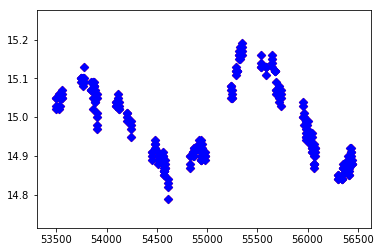

In [3]:
# Plot that lightcurve
%matplotlib inline
plt.errorbar(lc_mjd,lc_mag, lc_magerr, fmt='None', color='blue') 
plt.scatter(lc_mjd,lc_mag, marker='D', color='red', s=34)

plt.errorbar(time,mag,error, fmt='None' , color='red') # complete
plt.scatter(time,mag, marker='D', color='blue', s=34)

In [5]:

lc = np.array([mag, time, error])
feats = FATS.FeatureSpace(Data=['magnitude', 'time', 'error']).calculateFeature(lc) # complete

TypeError: slice indices must be integers or None or have an __index__ method

In [6]:
print('There are a total of {:d} features for single band LCs'.format(len(feats.result(method='array'))))

print('Here is a dictionary showing the features:')

feats.result(method='dict')

NameError: name 'feats' is not defined